In [1]:
#implementation of the KNN algorithm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#importing the custome data handler
from data_handler.data_handler import DataHandler
from grid_search import *
from bayes_search import *

In [2]:
#class for the KNN algorithm
class KNN():
    def __init__(self,K=3,P=2,weight='distance'):
        self.K=K 
        self.model = KNeighborsClassifier(n_neighbors=self.K,p=P,weights=weight)
        self.data_handler = DataHandler()
    
    #loads the training data from the data handler as features and targets from the cleaned training data
    def load_train_data(self):
        self.train_features,self.train_targets = self.data_handler.split_data(self.data_handler.train_data)
    
    #loads the validation data from the data handler as features and targets from the cleaned validation data
    def load_validation_data(self):
        self.validation_features,self.validation_targets = self.data_handler.split_data(self.data_handler.validation_data)
    
    #loads the test data from the data handler as features and targets from the cleaned test data
    def load_test_data(self):
        self.test_features,self.test_targets = self.data_handler.split_data(self.data_handler.test_data)
    
    #trains the model on the training data
    def train(self):
        self.model.fit(self.train_features,self.train_targets)
    
    #predict the target for given features and returns the predicted targets use to predict the test data
    def predict(self,features):
        return self.model.predict(features)
    
    #evaluates the model on the validation data
    def evaluate(self,DataFlag="Validation"):
        if DataFlag=="Validation":
            features = self.validation_features
            targets = self.validation_targets
        elif DataFlag=="Test":
            features = self.test_features
            targets = self.test_targets
        predictions = self.predict(features)
        print("Accuracy: ",accuracy_score(targets,predictions))
        print("Classification Report: \n",classification_report(targets,predictions))
        print("Confusion Matrix: \n",confusion_matrix(targets,predictions))
        print("Roc Score : ",roc_auc_score(targets,predictions))
        self.plot_confusion_matrix(targets,predictions,DataFlag)

    #plot confusion matrix
    def plot_confusion_matrix(self,targets,predictions,dataFlag):
        cm = confusion_matrix(targets, predictions) 
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for {} data".format(dataFlag))
        plt.show()



### Creating a basic model with default parameters

In [3]:
print("Creating a basic KNN model with default parameters")
knn=KNN(K=3)
#load training data
knn.load_train_data()
#train model
knn.train()
#load validation data
knn.load_validation_data()

Creating a basic KNN model with default parameters


Evaluating model on the validation dataset
Accuracy:  0.7528089887640449
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        58
           1       0.63      0.71      0.67        31

    accuracy                           0.75        89
   macro avg       0.73      0.74      0.74        89
weighted avg       0.76      0.75      0.76        89

Confusion Matrix: 
 [[45 13]
 [ 9 22]]
Roc Score :  0.7427697441601779


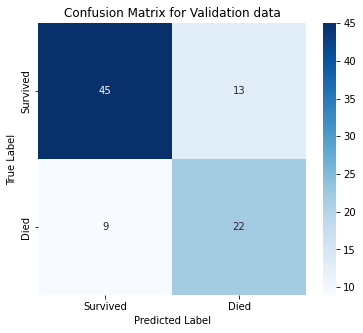

In [4]:
#evaluate model on validation data
print("Evaluating model on the validation dataset")
knn.evaluate(DataFlag="Validation")

Evaluating model on the test dataset
Accuracy:  0.7359550561797753
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       109
           1       0.64      0.71      0.68        69

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

Confusion Matrix: 
 [[82 27]
 [20 49]]
Roc Score :  0.7312192527589416


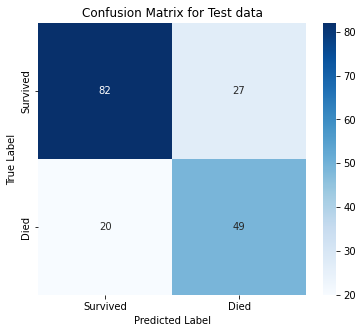

In [5]:
#load test data
knn.load_test_data()
#evaluate model on test data
print("Evaluating model on the test dataset")
knn.evaluate(DataFlag="Test")

### Performing model tuning to find optimal K

In [7]:
gs=GridSearch(cv=3)
bs=BayesianSearch()
print("Applying Grid search to tune the K hyperparameter of the model")
result_gs=gs.tune_knn(x_train=knn.validation_features,y_train=knn.validation_targets)

Applying Grid search to tune the K hyperparameter of the model
Fitting 3 folds for each of 300 candidates, totalling 900 fits


In [8]:
print("Applying Bayesian search to tune the K hyperparameter of the model")
result_bs=bs.tune_knn(x_train=knn.validation_features,y_train=knn.validation_targets)

Applying Bayesian search to tune the K hyperparameter of the model


In [9]:
print("Grid Search Results: ",result_gs)
print("Bayesian Search Results: ",result_bs)

Grid Search Results:  (0.786206896551724, {'n_neighbors': 14, 'p': 8, 'weights': 'distance'})
Bayesian Search Results:  (0.774712643678161, OrderedDict([('n_neighbors', 1), ('p', 2), ('weights', 'distance')]))


### New model with optimal K and checking accuracy on validation and test data

In [19]:
print("Creating a new KNN model with the tunned K parameter for max accuracy")
new_knn=KNN(K=14,P=8,weight='distance')
new_knn.load_train_data()
new_knn.train()


Creating a new KNN model with the tunned K parameter for max accuracy


Evaluating optimized model on the validation dataset
Accuracy:  0.7528089887640449
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        58
           1       0.62      0.74      0.68        31

    accuracy                           0.75        89
   macro avg       0.73      0.75      0.74        89
weighted avg       0.77      0.75      0.76        89

Confusion Matrix: 
 [[44 14]
 [ 8 23]]
Roc Score :  0.7502780867630701


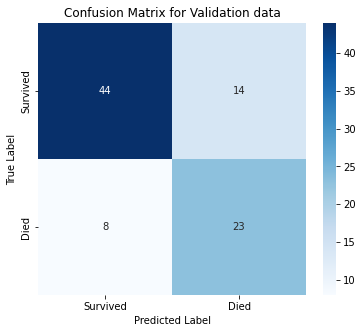

In [20]:
new_knn.load_validation_data()
print("Evaluating optimized model on the validation dataset")
new_knn.evaluate(DataFlag="Validation")

Evaluating optimized model on the test dataset
Accuracy:  0.7584269662921348
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       109
           1       0.72      0.62      0.67        69

    accuracy                           0.76       178
   macro avg       0.75      0.73      0.74       178
weighted avg       0.76      0.76      0.75       178

Confusion Matrix: 
 [[92 17]
 [26 43]]
Roc Score :  0.733612551522404


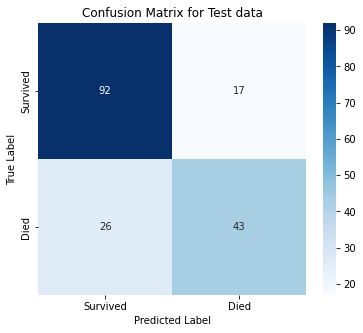

In [21]:
new_knn.load_test_data()
print("Evaluating optimized model on the test dataset")
new_knn.evaluate(DataFlag="Test")